In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import time

In [2]:
bank_data = pd.read_csv('../Bank Marketing Data/data/bank-additional-full.csv', sep = ';')
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Checking for missing values in the dataset
missing_values = bank_data.isnull().sum()
missing_values[missing_values > 0]  # Display columns with missing values if any

Series([], dtype: int64)

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Identifying categorical variables
categorical_columns = bank_data.select_dtypes(include=['object']).columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [6]:
# Displaying unique values in each categorical column
unique_values = {column: bank_data[column].unique() for column in categorical_columns}
unique_values

{'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 'default': array(['no', 'unknown', 'yes'], dtype=object),
 'housing': array(['no', 'yes', 'unknown'], dtype=object),
 'loan': array(['no', 'yes', 'unknown'], dtype=object),
 'contact': array(['telephone', 'cellular'], dtype=object),
 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
        'sep'], dtype=object),
 'day_of_week': array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 'poutcome': array(['nonexistent', 'failure', 'success'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

In [7]:
# Creating a copy of the dataset to apply transformations
encoded_data = bank_data.copy()

# Label encoding for binary categorical variables
label_encoder = LabelEncoder()
encoded_data['contact'] = label_encoder.fit_transform(encoded_data['contact'])
encoded_data['y'] = label_encoder.fit_transform(encoded_data['y'])

# One-hot encoding for other categorical variables
encoded_data = pd.get_dummies(encoded_data, columns=[col for col in categorical_columns if col not in ['contact', 'y']])

# Display the first few rows of the transformed dataset
encoded_data.head()

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,261,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
1,57,1,149,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
2,37,1,226,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
3,40,1,151,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
4,56,1,307,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False


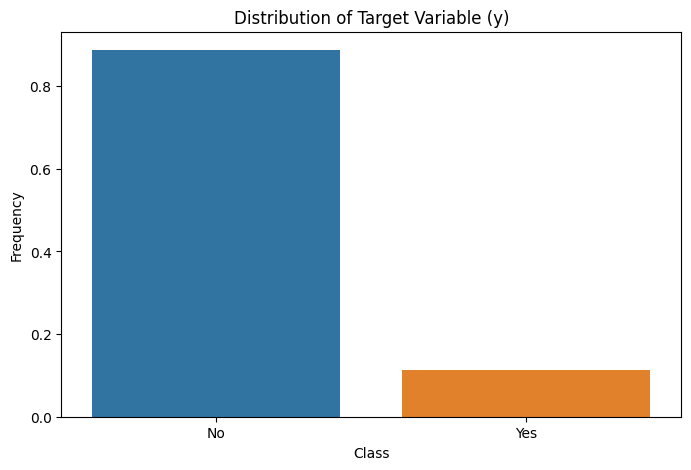

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

In [8]:
# Distribution of the target variable
target_distribution = encoded_data['y'].value_counts(normalize=True)

# Plotting the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])  # 0: No, 1: Yes
plt.show()

target_distribution

In [9]:
# Summary statistics for numerical features
numerical_summary = encoded_data.describe()
numerical_summary

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.365252,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,0.481507,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,0.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,1.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


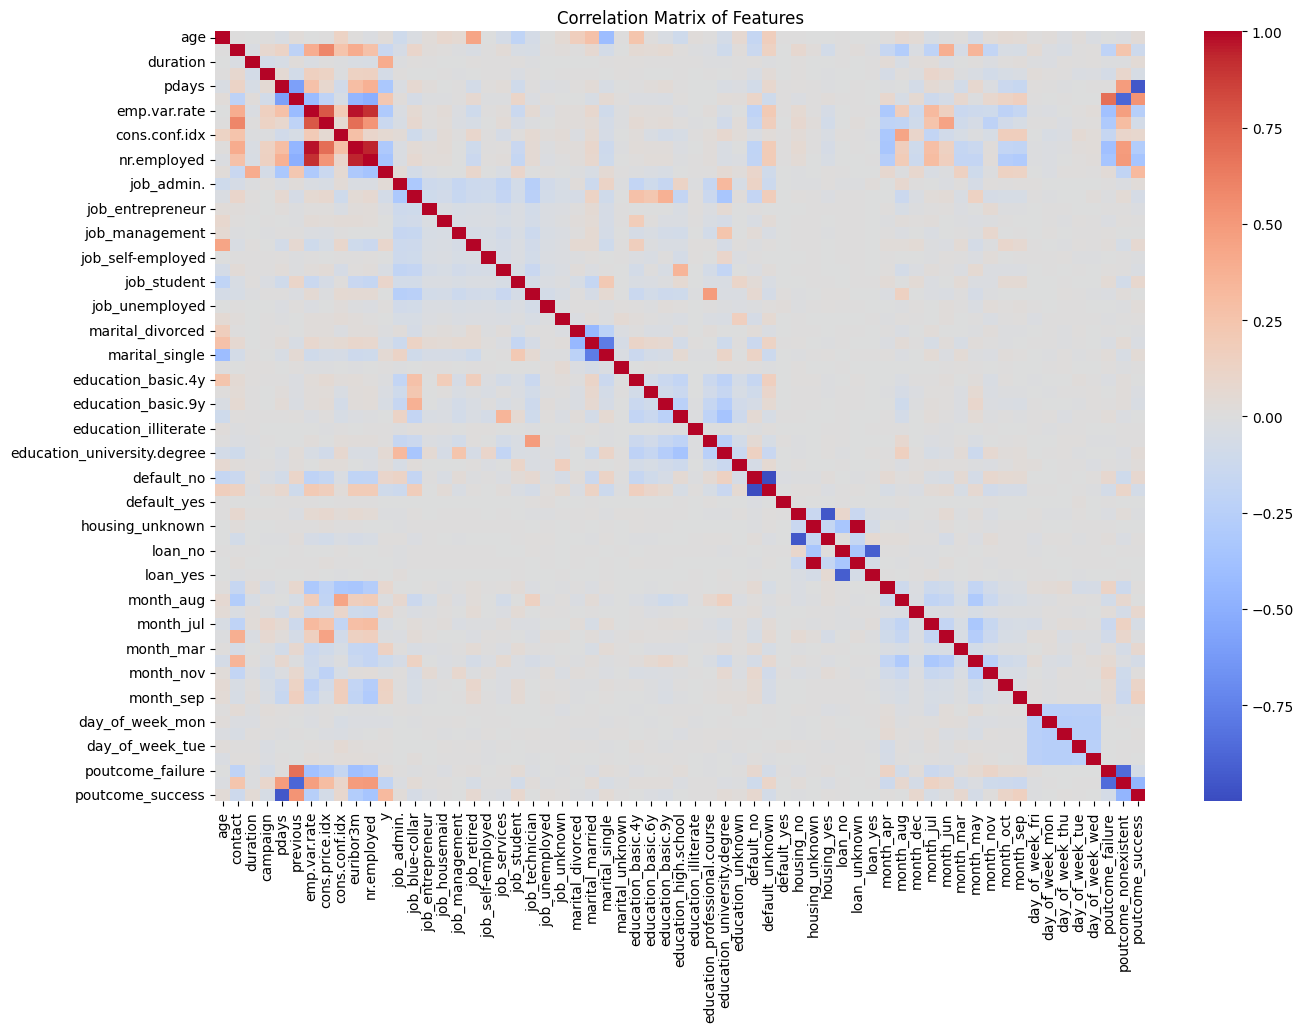

In [10]:
# Correlation matrix
correlation_matrix = encoded_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

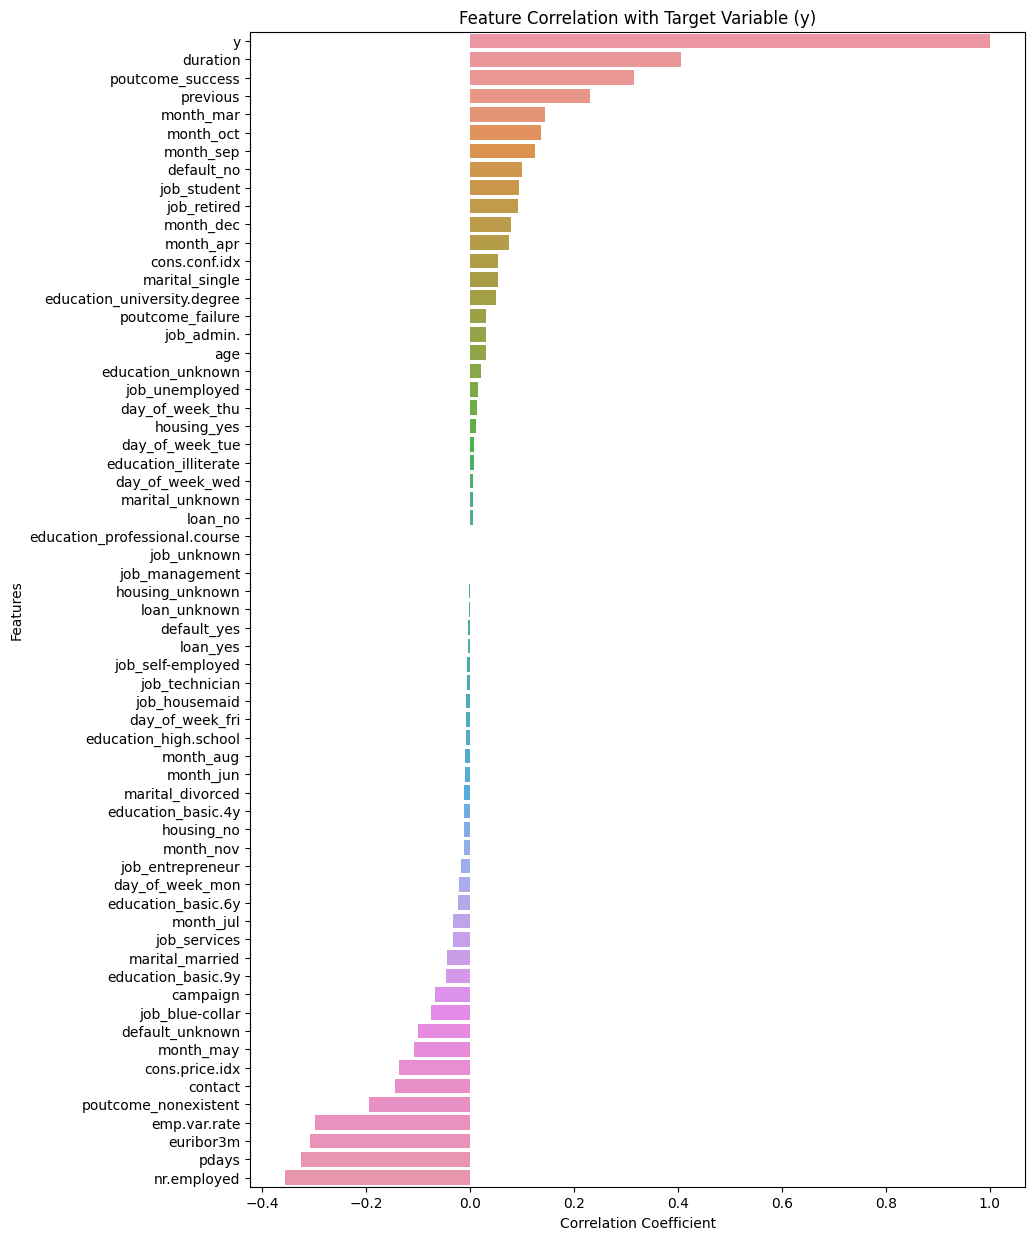

y                       1.000000
duration                0.405274
poutcome_success        0.316269
previous                0.230181
month_mar               0.144014
                          ...   
poutcome_nonexistent   -0.193507
emp.var.rate           -0.298334
euribor3m              -0.307771
pdays                  -0.324914
nr.employed            -0.354678
Name: y, Length: 63, dtype: float64

In [11]:
# Correlations with the target variable 'y'
target_correlations = correlation_matrix['y'].sort_values(ascending=False)

# Displaying correlations with the target variable
plt.figure(figsize=(10, 15))
sns.barplot(x=target_correlations.values, y=target_correlations.index)
plt.title('Feature Correlation with Target Variable (y)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

target_correlations

In [12]:
# Separating features and target variable
X = encoded_data.drop('y', axis=1)
y = encoded_data['y']

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Shapes of the split datasets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((32950, 62), (8238, 62), (32950,), (8238,))

In [13]:
# Initializing the KNN model
knn = KNeighborsClassifier()

# Recording the start time for training
start_time_knn = time.time()

# Fitting the KNN model
knn.fit(X_train_scaled, y_train)

# Recording the end time for training
end_time_knn = time.time()

# Calculating the training time
train_time_knn = end_time_knn - start_time_knn

# Making predictions on the training and testing sets
knn_train_predictions = knn.predict(X_train_scaled)
knn_test_predictions = knn.predict(X_test_scaled)

# Calculating the accuracy on the training and testing sets
knn_train_accuracy = accuracy_score(y_train, knn_train_predictions)
knn_test_accuracy = accuracy_score(y_test, knn_test_predictions)

# Storing KNN results
knn_results = {
    "Train Time": train_time_knn,
    "Train Accuracy": knn_train_accuracy,
    "Test Accuracy": knn_test_accuracy
}

c:\Users\kgood\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\kgood\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [14]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Recording training time
start_time_lr = time.time()
log_reg.fit(X_train_scaled, y_train)
end_time_lr = time.time()

# Predictions
lr_train_predictions = log_reg.predict(X_train_scaled)
lr_test_predictions = log_reg.predict(X_test_scaled)

# Accuracy scores
lr_train_accuracy = accuracy_score(y_train, lr_train_predictions)
lr_test_accuracy = accuracy_score(y_test, lr_test_predictions)

# Storing results
log_reg_results = {
    "Train Time": end_time_lr - start_time_lr,
    "Train Accuracy": lr_train_accuracy,
    "Test Accuracy": lr_test_accuracy
}

In [15]:
# Decision Tree
decision_tree = DecisionTreeClassifier()

# Recording training time
start_time_dt = time.time()
decision_tree.fit(X_train_scaled, y_train)
end_time_dt = time.time()

# Predictions
dt_train_predictions = decision_tree.predict(X_train_scaled)
dt_test_predictions = decision_tree.predict(X_test_scaled)

# Accuracy scores
dt_train_accuracy = accuracy_score(y_train, dt_train_predictions)
dt_test_accuracy = accuracy_score(y_test, dt_test_predictions)

# Storing results
decision_tree_results = {
    "Train Time": end_time_dt - start_time_dt,
    "Train Accuracy": dt_train_accuracy,
    "Test Accuracy": dt_test_accuracy
}

In [16]:
# Support Vector Machine
svm = SVC()

# Recording training time
start_time_svm = time.time()
svm.fit(X_train_scaled, y_train)
end_time_svm = time.time()

# Predictions
svm_train_predictions = svm.predict(X_train_scaled)
svm_test_predictions = svm.predict(X_test_scaled)

# Accuracy scores
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)

# Storing results
svm_results = {
    "Train Time": end_time_svm - start_time_svm,
    "Train Accuracy": svm_train_accuracy,
    "Test Accuracy": svm_test_accuracy
}

In [24]:
# Assuming the results from each model are stored in log_reg_results, decision_tree_results, and svm_results
results_df = pd.DataFrame({
    "K-Nearest Neighbors": knn_results, 
    "Logistic Regression": log_reg_results,
    "Decision Trees": decision_tree_results,
    "Support Vector Machines": svm_results
}).T

results_df

,Train Time,Train Accuracy,Test Accuracy
K-Nearest Neighbors,0.002,0.919332,0.897912
Logistic Regression,0.076,0.911654,0.911508
Decision Trees,0.138,1.000000,0.887230
Support Vector Machines,10.220,0.927678,0.908837


In [18]:
# Running all the models at once - Should be same as previous results_df except Train Time

# Dictionary to hold model results
model_results = {}

# List of models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Trees": DecisionTreeClassifier(),
    "Support Vector Machines": SVC()
}

# Fitting and scoring each model
for model_name, model in models.items():
    # Recording the start time
    start_time = time.time()
    
    # Fitting the model
    model.fit(X_train_scaled, y_train)
    
    # Recording the end time
    end_time = time.time()
    
    # Calculating train time
    train_time = end_time - start_time
    
    # Predictions
    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)
    
    # Accuracy scores
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    # Storing results
    model_results[model_name] = [train_time, train_accuracy, test_accuracy]

# Creating a DataFrame to display the results
results_df = pd.DataFrame(model_results, index=['Train Time', 'Train Accuracy', 'Test Accuracy']).T
results_df

c:\Users\kgood\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\kgood\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,Train Time,Train Accuracy,Test Accuracy
K-Nearest Neighbors,0.004001,0.919332,0.897912
Logistic Regression,0.194999,0.911654,0.911508
Decision Trees,0.216006,1.000000,0.885530
Support Vector Machines,21.132999,0.927678,0.908837


In [19]:
# Convert X_train_scaled and X_test_scaled back to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Dropping features with low correlation
correlation_threshold = 0.01  # Setting a threshold for correlation
low_corr_features = target_correlations[abs(target_correlations) < correlation_threshold].index
X_train_reduced = X_train_df.drop(low_corr_features, axis=1)
X_test_reduced = X_test_df.drop(low_corr_features, axis=1)

X_train_reduced, X_test_reduced

(            age   contact  duration  campaign     pdays  previous   
 0     -0.001669  1.319656 -0.631114 -0.206242  0.194661 -0.350902  \
 1     -0.864095 -0.757773 -0.546321  0.513676  0.194661 -0.350902   
 2      1.819007 -0.757773 -0.943306  1.233593  0.194661  1.677559   
 3      0.285806 -0.757773 -0.631114  0.873635  0.194661 -0.350902   
 4     -0.097494  1.319656  0.332441 -0.206242  0.194661 -0.350902   
 ...         ...       ...       ...       ...       ...       ...   
 32945  1.723182  1.319656  0.652341 -0.206242  0.194661 -0.350902   
 32946 -0.289144  1.319656  0.116604 -0.566200  0.194661 -0.350902   
 32947 -0.480795 -0.757773 -0.245692 -0.566200 -5.147753  1.677559   
 32948 -0.001669  1.319656  0.143584 -0.206242  0.194661 -0.350902   
 32949 -1.055745 -0.757773  0.290044 -0.206242  0.194661 -0.350902   
 
        emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  ...  month_mar   
 0          0.838794        0.589080      -0.472769   0.771354  ...  -0.1171

In [20]:
# Hyperparameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search with cross-validation
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_reduced, y_train)

# Best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

best_params_knn, best_score_knn

c:\Users\kgood\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\kgood\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

({'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'},
 0.8990288315629742)

In [21]:
# Hyperparameter grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_reduced, y_train)

# Best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

best_params_dt, best_score_dt

({'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2},
 0.908679817905918)

In [22]:
# Initialize models with optimal parameters
log_reg_opt = LogisticRegression(max_iter=1000)
decision_tree_opt = DecisionTreeClassifier(**best_params_dt)  # Replace with actual optimal params. ** used to unpack dictionary
knn_opt = KNeighborsClassifier(**best_params_knn)  # Replace with actual optimal params. ** used to unpack dictionary
svm_opt = SVC()

models_opt = {
    "Logistic Regression": log_reg_opt,
    "Decision Trees": decision_tree_opt,
    "K-Nearest Neighbors": knn_opt,
    "Support Vector Machines": svm_opt
}

# Dictionary to hold model results
model_results_opt = {}

# Train and evaluate each model
for model_name, model in models_opt.items():
    # Training the model
    start_time = time.time()
    model.fit(X_train_reduced, y_train)
    end_time = time.time()

    # Predictions on the test set
    test_predictions = model.predict(X_test_reduced)

    # Accuracy on the test set
    test_accuracy = accuracy_score(y_test, test_predictions)

    # Storing results
    model_results_opt[model_name] = [end_time - start_time, test_accuracy]

# Creating a DataFrame to display the results
results_df_opt = pd.DataFrame(model_results_opt, index=['Train Time', 'Test Accuracy']).T
results_df_opt

,Train Time,Test Accuracy
Logistic Regression,0.082999,0.910415
Decision Trees,0.078000,0.909565
K-Nearest Neighbors,0.002000,0.896698
Support Vector Machines,6.407711,0.908230
